In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Data = pd.read_csv('data.csv')
X = Data.drop(columns = ['loc_rowid','koi_pdisposition'])
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_eccen,koi_impact,koi_duration,koi_depth,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,0,0,0,0,9.488036,170.538750,0.0,0.146,2.95750,615.8,...,0.430,0.940,-0.000200,-0.000550,-0.010,0.200,0.200,0.080,0.310,0.320
1,0,0,0,0,54.418383,162.513840,0.0,0.586,4.50700,874.8,...,-0.630,1.230,0.000660,-0.001050,0.390,0.000,0.390,0.490,0.120,0.500
2,0,0,0,0,19.899140,175.850252,0.0,0.969,1.78220,10829.0,...,-0.021,-0.038,0.000700,0.000600,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,0,1,0,0,1.736952,170.307565,0.0,1.276,2.40641,8079.2,...,-0.111,0.002,0.003020,-0.001420,-0.249,0.147,0.289,-0.257,0.099,0.276
4,0,0,0,0,2.525592,171.595550,0.0,0.701,1.65450,603.3,...,-0.010,0.230,0.000080,-0.000070,0.030,-0.090,0.100,0.070,0.020,0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0,1,1,0,0.527699,131.705093,0.0,1.252,3.22210,1579.2,...,0.792,-0.484,-0.000237,0.000178,2.132,-1.757,2.763,2.344,-1.756,2.929
9560,0,0,0,0,1.739849,133.001270,0.0,0.043,3.11400,48.5,...,0.100,2.000,-0.000018,-0.000074,0.740,-0.250,0.780,0.500,-0.180,0.530
9561,0,0,1,0,0.681402,132.181750,0.0,0.147,0.86500,103.6,...,7.200,-5.600,-0.000720,0.000500,3.410,-3.650,5.000,3.380,-3.890,5.160
9562,0,0,0,0,333.486169,153.615010,0.0,0.214,3.19900,639.1,...,0.310,0.010,-0.000290,-0.000100,1.061,1.320,1.690,1.450,1.370,2.000


In [ ]:
Y = Data['koi_pdisposition']
Encode = {"CANDIDATE":1, "FALSE POSITIVE":0}
Y_Encoded = Y.map(Encode)
Y_Encoded

x_train, x_test, y_train, y_test = train_test_split(X, Y_Encoded, test_size=0.2, stratify= Y_Encoded)

0       1
1       1
2       1
3       0
4       1
       ..
9559    0
9560    1
9561    0
9562    1
9563    0
Name: koi_pdisposition, Length: 9564, dtype: int64

In [49]:
param_grid = {
    "n_estimators": [100,200,300,400,500,600],
    "max_depth": [7,8,9],
    "min_samples_leaf": [5,10,20],
    "max_features": [None,"sqrt","log2"]
}

GSCV  = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
GSCV.fit(X,Y_Encoded)
results = GSCV.cv_results_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [62]:
GSCV.best_params_

{'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 5,
 'n_estimators': 600}

In [ ]:
RFC = RandomForestClassifier(n_estimators=600, max_depth=9, min_samples_leaf=5, max_features=None)
RFC.fit(x_train, y_train)
y_pred = RFC.predict(x_test)

print("Accuracy: ", accuracy_score(y_test,y_pred))
print()
print("Classification Report: ")
print(classification_report(y_test,y_pred, target_names=Encode))

Accuracy:  0.9895452169367486

Classification Report: 
                precision    recall  f1-score   support

     CANDIDATE       0.99      0.99      0.99       970
FALSE POSITIVE       0.99      0.99      0.99       943

      accuracy                           0.99      1913
     macro avg       0.99      0.99      0.99      1913
  weighted avg       0.99      0.99      0.99      1913



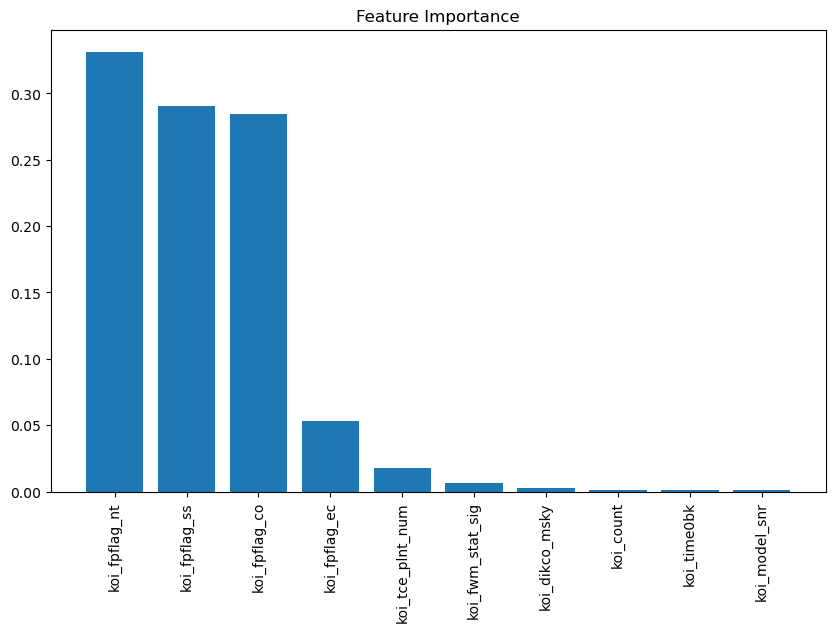

In [70]:
Importance = RFC.feature_importances_
Indices = np.argsort(Importance)[::-1]
TopIndices = Indices[:10]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(10), Importance[TopIndices], align="center")
plt.xticks(range(10), X.columns[TopIndices], rotation=90)

plt.show()

In [76]:
New_X = Data[["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_tce_plnt_num", "koi_fwm_stat_sig", "koi_dikco_msky", "koi_count", "koi_time0bk", "koi_model_snr"]]

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(New_X, Y_Encoded, test_size=0.2, stratify= Y_Encoded)

RFC_New = RandomForestClassifier(n_estimators=600, max_depth=9, min_samples_leaf=5, max_features=None)
RFC_New.fit(x_new_train, y_new_train)
y_new_pred = RFC_New.predict(x_new_test)

print("Accuracy: ", accuracy_score(y_new_test,y_new_pred))
print()
print("Classification Report: ")
print(classification_report(y_new_test,y_new_pred, target_names=Encode))


Accuracy:  0.992681651855724

Classification Report: 
                precision    recall  f1-score   support

     CANDIDATE       0.99      0.99      0.99       970
FALSE POSITIVE       0.99      0.99      0.99       943

      accuracy                           0.99      1913
     macro avg       0.99      0.99      0.99      1913
  weighted avg       0.99      0.99      0.99      1913



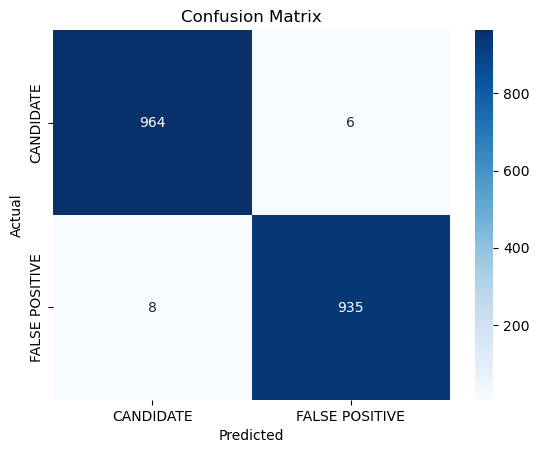

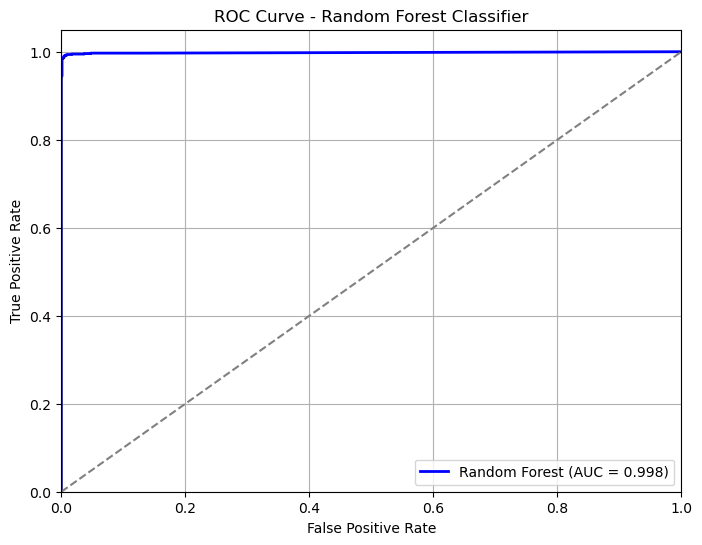

In [78]:
from sklearn.metrics import roc_curve, auc
y_prob = RFC_New.predict_proba(x_new_test)[:, 1]
fpr,tpr,tresholds = roc_curve(y_new_test,y_prob)
roc_auc = auc(fpr,tpr)

cm = confusion_matrix(y_new_test, y_new_pred)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=Encode, yticklabels=Encode)
ax.invert_xaxis
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Random Forest (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")  # random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [79]:
import joblib

joblib.dump(RFC_New, "RandomForestClassifier.pkl")

['RandomForestClassifier.pkl']